# Practice on images descriptors (except deep descriptors)


In [1]:
from skimage import io
from skimage import data
from skimage import transform
import numpy as np
from matplotlib import pyplot as plt
import math

C:\Users\Raffaele\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
%matplotlib inline

## Images from the library scikit-image

In [6]:
img = data.coffee()
#img = data.chelsea()
#img = io.imread('/home/lingrand/Ens/SSII/Cours8-contours/carreNoir.png') #data.coffee()
# you can save an image to an image file
#io.imsave("coffee.png",img)

In [8]:
print(img.shape)

(400, 600, 3)


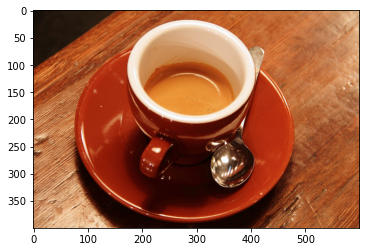

In [7]:
plt.imshow(img)

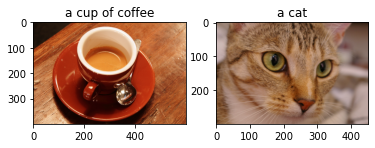

In [9]:
# a figure with 2 images
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.ravel()
ax[0].imshow(data.coffee())
ax[0].title.set_text('a cup of coffee')
ax[1].imshow(data.chelsea())
ax[1].title.set_text('a cat')

## Smoothing using convolution

We will start to use a simple method of 2D convolution: <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html">scipy.ndimage.convolve</a>.

Gaussian smoothing is approximated by a convolution with the kernel $\frac{1}{16}\begin{pmatrix} 1 & 2 & 1\\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{pmatrix}$.

This convolution only deals with a single channel. We thus need to apply this function on each channel and then recompose another image.

In [10]:
from scipy import ndimage

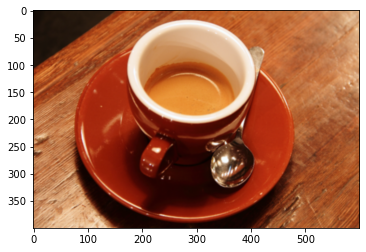

In [11]:
lissGauss3x3 = np.array([[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]])
r = ndimage.convolve(img[:,:,0],lissGauss3x3)
g = ndimage.convolve(img[:,:,1],lissGauss3x3)
b = ndimage.convolve(img[:,:,2],lissGauss3x3)
imgLisse = np.dstack((r,g,b))
plt.imshow(imgLisse)

Strange colors ... What's the problem ? How to improve ?

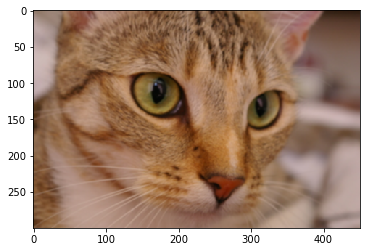

In [9]:
# modifications ?
#I neded to devide by 16

This image looks better !

## Edges by first derivative

A well-know detector is the one by Sobel. Have a look on the edges long x-axis and y-axis before composing the final result. 

min =  0
max =  255
[ 1 12 23]


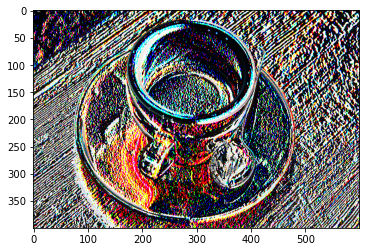

In [13]:
sobelx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])/4.0
sobely = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])/4.0

r = ndimage.convolve(img[:,:,0],sobelx)
g = ndimage.convolve(img[:,:,1],sobelx)
b = ndimage.convolve(img[:,:,2],sobelx)
imgSobelx = np.dstack((r,g,b))
plt.imshow(imgSobelx)
print("min = ", imgSobelx.min())
print("max = ", r.max())
print(imgSobelx[100,400,:])

If you are note sure of the result, try your detector on a simple image composed of a black square on a white background.

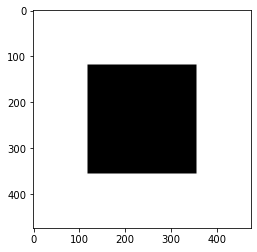

In [14]:
img = io.imread('C:/Users/Raffaele/Desktop/Lezioni/machine learning/machine_learning_2/carreNoir.png') 
plt.imshow(img)

<class 'numpy.ndarray'> (474, 474) <class 'numpy.uint8'> 0 255


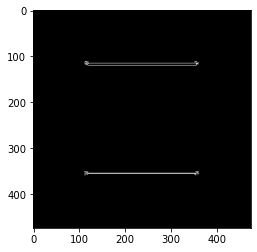

In [15]:
sobel_mag = ndimage.sobel(img[:,:,0], axis=0)
print(type(sobel_mag), sobel_mag.shape,type(sobel_mag[0][0]),sobel_mag.min(), sobel_mag.max())
plt.imshow(sobel_mag, cmap = plt.cm.gray )
#plt.imshow(np.abs(ndimage.sobel(img[:,:,0],axis=0)),cmap=plt.cm.gray) # ou axis =1

Why do you obtain only a single horizontal edge ?

And what about to write the code from scratch ?

In [16]:
# img has only a single channel and k is from odd dimensions.
# we will ignore borders
def maConvolution(img, k):
    (h,w) = img.shape
    dimK = k.shape[0]
    d = dimK//2
    res = np.zeros(shape=(h,w), dtype=np.float64)
    for i in range(d, h-d):
        for j in range(d, w-d):
            for u in range(dimK):
                for v in range(dimK):
                    ## Ã  vous d'ajouter la bonne ligne ICI
                    res[i][j] += img[i-u+d,j-v+d]*k[u][v]
    return res

In [ ]:
sobelx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])/4.0
sobely = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])/4.0

r = np.abs(maConvolution(img[:,:,0],sobelx))
g = np.abs(maConvolution(img[:,:,1],sobelx))
b = np.abs(maConvolution(img[:,:,2],sobelx))
imgSobelx = np.dstack((r,g,b))
plt.imshow(imgSobelx)
print("min = ", imgSobelx.min())
print("max = ", r.max())
print(imgSobelx[100,400,:])

Let's forger ndimage for Sobel edges and take a look to scikit-image.

In [30]:
from skimage.filters import sobel

-1.0 0.996078431372549
<class 'numpy.float64'>


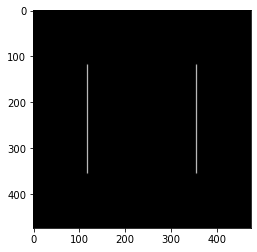

In [31]:
sobelx = sobel(img,axis=1) # or axis = 0
print(sobelx.min(), sobelx.max())
plt.imshow(np.abs(sobelx))
print(type(sobelx[0][0][0]))

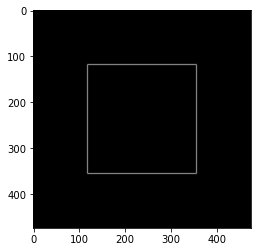

In [32]:
# we now compute the strengh of the edges
sobel_mag = np.sqrt(sobel(img, axis=0)**2 + sobel(img, axis=1)**2)/math.sqrt(2)
plt.imshow(sobel_mag)

## Points of interest

### Harris

Let's start with Harris:

In [36]:
from skimage.feature import corner_harris, corner_peaks

In [37]:
pts=corner_peaks(corner_harris(img[:,:,1]), min_distance=1)
print( pts.shape[0], ' points found')
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')
plt.scatter(y=pts[:,0],x=pts[:,1],c='r',s=10)
plt.show()

KeyboardInterrupt: 

How to add points of interest ? Have a look to the default parameters.

### SIFT

Let's try the SIFT detector and descriptor. We will use the OpenCV implementation. 

In [ ]:
# if necessary installation :
#            !pip install opencv-contrib-python

import cv2
print(cv2.__version__)

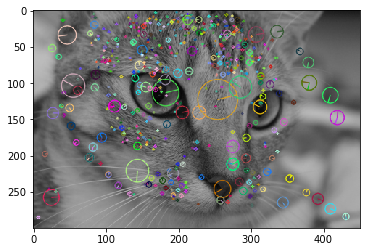

In [43]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp,des = sift.detectAndCompute(gray,None)
cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)